In [30]:
import math
def calculateProbability1(x, mean, stdev):
    exponent = math.exp(-(math.pow(float(x)-float(mean),2)/(2*math.pow(float(stdev),2))))
    return float((1 / (math.sqrt(2*math.pi) * stdev)) * exponent)

In [31]:
import pandas as pd
df= pd.read_csv('new.csv')

In [32]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df = df.sample(frac=1)

In [34]:
def cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32): 
    probability = []
    for j in d1:
            itr=0
            prob=[0,0,0]
            for k in j:
                #print(k)
                if itr == 0:
                    prob[0] = calculateProbability1(k,m11,s11) 
                    prob[1] = calculateProbability1(k,m21,s21) 
                    prob[2] = calculateProbability1(k,m31,s31) 
                if itr==1:
                    
                    prob[0] = prob[0]*calculateProbability1(k,m12,s12) 
                    
                    prob[1] = prob[1]*calculateProbability1(k,m22,s22) # for varsicolor
                   
                    prob[2] = prob[2]*calculateProbability1(k,m32,s32)#for virginica
                itr = itr +1
            probability.append(prob)
    return probability

In [53]:
d1 = df[['sepal_length','petal_width']].tail(45).values

y = df['species'].tail(45).values
l = 0
count = 0
mp = 16
acc = []
for i in range(0,10):
    data = df.head(15+l)
    if count!=0:
        data.species.iloc[[mp-1]] = y_p
    count = count+1
   
    data_mean = data.groupby('species', as_index=False)['sepal_length','petal_width'].mean()
    data_std = data.groupby('species')['sepal_length','petal_width'].std()
    std = data_std.values
    m = data_mean.values
    s11 = std[0][0]
    s12 = std[0][1]
    s21 = std[1][0]
    s22 = std[1][1]
    s31 = std[2][0]
    s32 = std[2][1]
    m11 = m[0][1]
    m12 = m[0][2]
    m21 = m[1][1]
    m22 = m[1][2]
    m31 = m[2][1]
    m32 = m[2][2]
    #probability = []
    probability = cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    l+=1
    y_hat = []
    for i in probability:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_hat.append("Iris-setosa")
            elif (num2 >= num1) and (num2 >= num3):
                y_hat.append("Iris-versicolor")
            else:
                y_hat.append("Iris-virginica")
    true_predicted = 0
    false_predicted = 0
    for d in range(0,45):
            if y[d]==y_hat[d]:
                true_predicted+=1
            else:
                false_predicted+=1
                
    x_p = df.iloc[l+15:l+16]
    prob_x_p = cal_prob(x_p[['sepal_length','petal_width']].values,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    num1 = prob_x_p[0][0]
    num2 = prob_x_p[0][1]
    num3 = prob_x_p[0][2]
    y_p = ""
    if (num1 >= num2) and (num1 >= num3):
                y_p = "Iris-setosa"# = num1
    elif (num2 >= num1) and (num2 >= num3):
                y_p = "Iris-versicolor"#largest = num2
    else:
                y_p = "Iris-virginica"
    print("==="*30)
    accur = true_predicted/(true_predicted+false_predicted)
    print("äccuracy:  ",accur)
    if count<=5:
        acc.append(accur)

äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111


C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111
äccuracy:   0.9111111111111111


In [54]:
import numpy as np

In [55]:
np.random.seed(5)
d1 = df[['sepal_length','petal_width']].tail(45).values
y = df['species'].tail(45).values
#print(len(d1))
l = 0
count = 0
mp = 16
p=0
accuracy1 = []
for i in range(0,5):
    p = p+1
    if count!=0:
        frames = [data,x1]
        data = pd.concat(frames)
    else:
        data = df.head(20)
    count = count+1


    print(data.shape)
    count = count+1
    data_mean = data.groupby('species', as_index=False)['sepal_length','petal_width'].mean()
    data_std = data.groupby('species')['sepal_length','petal_width'].std()
    #y = data['species']
    std = data_std.values
    m = data_mean.values
   # print(std)
    #print(m)
   # print(data_std)
    s11 = std[0][0]
    s12 = std[0][1]
    s21 = std[1][0]
    s22 = std[1][1]
    s31 = std[2][0]
    s32 = std[2][1]
    m11 = m[0][1]
    m12 = m[0][2]
    m21 = m[1][1]
    m22 = m[1][2]
    m31 = m[2][1]
    m32 = m[2][2]
    #probability = []
    probability = cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    l = l+10
    y_hat = []
    for i in probability:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_hat.append("Iris-setosa")# = num1
            elif (num2 >= num1) and (num2 >= num3):
                y_hat.append("Iris-versicolor")#largest = num2
            else:
                y_hat.append("Iris-virginica")
    true_predicted = 0
    false_predicted = 0

    for d in range(0,45):
            if y[d]==y_hat[d]:
                true_predicted+=1
            else:
                false_predicted+=1

    #x_p = df.iloc[l+15:l+20]
    #print(x_p)
    x_p = df.sample(n=15,random_state=p,replace = False)
    prob_x_p = cal_prob(x_p[['sepal_length','petal_width']].values,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    num1 = prob_x_p[0][0]
    num2 = prob_x_p[0][1]
    num3 = prob_x_p[0][2]
    y_p = []
    for i in prob_x_p:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_p.append("Iris-setosa")
            elif (num2 >= num1) and (num2 >= num3):
                y_p.append("Iris-versicolor")
            else:
                y_p.append("Iris-virginica")
    x1 = x_p
   # print(x1.shape)
    #print(len(y_p))
    x1 = x1.drop(['species'],axis=1)
    x1['species'] = y_p
    print("Number of correctly classified points in Implementation of Navie Bayes: ",true_predicted)
    print("Number of incorrectly classified points in Implementation of Navie Bayes: ",false_predicted)
    print("==="*30)

    x =(true_predicted/(true_predicted+false_predicted))
    print(x)
    accuracy1.append(x)

(20, 5)
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
0.9111111111111111
(35, 5)
Number of correctly classified points in Implementation of Navie Bayes:  39
Number of incorrectly classified points in Implementation of Navie Bayes:  6
0.8666666666666667
(50, 5)
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
0.9111111111111111
(65, 5)
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
0.9111111111111111
(80, 5)
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
0.9111111111111111


[]

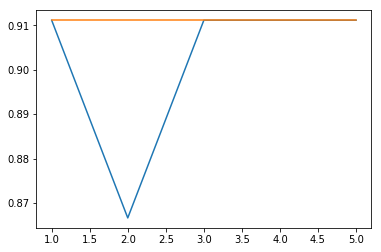

In [56]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5],accuracy1)
plt.plot([1,2,3,4,5],acc)
plt.plot()